In [43]:
import tensorflow as tf
import os
import numpy as np
import glob
from sklearn import utils as sk_utils


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# import tensorflow as tf
# print(tf.__version__)

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("solesensei/solesensei_bdd100k")

# print("Path to dataset files:", path)

In [2]:
# !unzip /content/bdd100k_seg.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d03a3cf-93d68f0a_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d1206c0-9fd20b03_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d1b7637-00000000_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d20e8bb-5a4ec16d_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d31065f-de478cdf_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d318552-891a0c47_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d31d6ab-fa604381_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d3734da-e7e6f31c_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d466735-00000000_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_set/2d529562-29dfe9ae_train_id.png  
  inflating: bdd100k_seg/bdd100k/seg/labels/train_se

In [44]:
# define image size
IMG_WIDTH = 64
IMG_HEIGHT = 64
IMG_CHANNELS = 3

In [45]:
TRAIN_PATH = '/content/bdd100k_seg/bdd100k/seg/images/train_set/*.jpg'
MASK_TRAIN = '/content/bdd100k_seg/bdd100k/seg/labels/train_set/*.png'

VAL_PATH = '/content/bdd100k_seg/bdd100k/seg/images/val_set/*.jpg'
MASK_VAL = '/content/bdd100k_seg/bdd100k/seg/labels/val_set/*.png'

TEST_PATH = '/content/bdd100k_seg/bdd100k/seg/images/test_set/*.jpg'
MASK_TEST = '/content/bdd100k_seg/bdd100k/seg/labels/test_set/*.png'


In [46]:
def load_image(file_path, is_x=False):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image)

    if is_x:
        image = tf.image.resize(image, (IMG_HEIGHT,IMG_WIDTH), method=tf.image.ResizeMethod.LANCZOS3)
        image = image / 255.0  # Normalize the image
    else:
        image = tf.image.resize(image, (IMG_HEIGHT,IMG_WIDTH), method='nearest', antialias=True)
    return image

## Load Training set

In [47]:
image_paths = sorted(glob.glob(TRAIN_PATH))
mask_paths = sorted(glob.glob(MASK_TRAIN))
image_paths, mask_paths = sk_utils.shuffle(image_paths, mask_paths, random_state=42)

X_train = []
Y_train = []

for x, y in zip(image_paths, mask_paths):
    X_train.append(load_image(x, True))
    Y_train.append(load_image(y))
    if len(X_train) % 500 == 0:
        print(len(X_train), 'data points loaded!')
else:
    print(len(X_train), 'data points loaded in total!')


# Convert the lists to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

Y_train[Y_train == 0] = 0   # Keep "road" class as is
Y_train[Y_train != 0] = 1

500 data points loaded!
1000 data points loaded!
1500 data points loaded!
2000 data points loaded!
2500 data points loaded!
3000 data points loaded!
3500 data points loaded!
4000 data points loaded!
4500 data points loaded!
5000 data points loaded!
5500 data points loaded!
6000 data points loaded!
6000 data points loaded in total!


## Load Validation set

In [48]:
image_paths = sorted(glob.glob(VAL_PATH))
mask_paths = sorted(glob.glob(MASK_VAL))
image_paths, mask_paths = sk_utils.shuffle(image_paths, mask_paths, random_state=42)

X_val = []
Y_val = []

for x, y in zip(image_paths, mask_paths):
    X_val.append(load_image(x, True))
    Y_val.append(load_image(y))
    if len(X_val) % 500 == 0:
        print(len(X_val), 'data points loaded!')
else:
    print(len(X_val), 'data points loaded in total!')


# Convert the lists to NumPy arrays
X_val = np.array(X_val)
Y_val = np.array(Y_val)

Y_val[Y_val == 0] = 0   # Keep "road" class as is
Y_val[Y_val != 0] = 1

500 data points loaded!
1000 data points loaded!
1000 data points loaded in total!


#LOADING TEST SET

In [49]:
image_paths = sorted(glob.glob(TEST_PATH))
mask_paths = sorted(glob.glob(MASK_TEST))
image_paths, mask_paths = sk_utils.shuffle(image_paths, mask_paths, random_state=42)

X_test = []
Y_test = []

for x, y in zip(image_paths, mask_paths):
    X_test.append(load_image(x, True))
    Y_test.append(load_image(y))
    if len(X_test) % 500 == 0:
        print(len(X_test), 'data points loaded!')
else:
    print(len(X_test), 'data points loaded in total!')


# Convert the lists to NumPy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

Y_test[Y_test == 0] = 0   # Keep "road" class as is
Y_test[Y_test != 0] = 1

500 data points loaded!
1000 data points loaded!
1000 data points loaded in total!


In [50]:
print('X train:', X_train.shape)
print('Y train:', Y_train.shape)
print('X val:', X_val.shape)
print('Y val:', Y_val.shape)
print('X test:', X_test.shape)
print('Y test:', Y_test.shape)

X train: (6000, 64, 64, 3)
Y train: (6000, 64, 64, 1)
X val: (1000, 64, 64, 3)
Y val: (1000, 64, 64, 1)
X test: (1000, 64, 64, 3)
Y test: (1000, 64, 64, 1)


In [51]:
import matplotlib.pyplot as plt
color_dict = {
    0: (0.7, 0.7, 0.7),     # road - gray
    1:  (0.2, 0.2, 0.2),     # others

}

def colorize_image(image, color_dict):
    # Ensure the image has only one channel (assuming one-hot encoded)
    if image.shape[-1] > 1:  # If more than one channel (e.g., one-hot encoded)
        image = np.argmax(image, axis=-1)  # Get the channel with the highest value

    # remove the extra dimension if present
    image = np.squeeze(image)
    # Generate the colored image using the color dictionary
    colored_image = np.zeros((image.shape[0], image.shape[1], 3))

    for pixel_value, color in color_dict.items():
        colored_image[image == pixel_value] = color

    # Convert the image to 8-bit unsigned integer
    colored_image = (colored_image * 255).astype(np.uint8)

    return colored_image

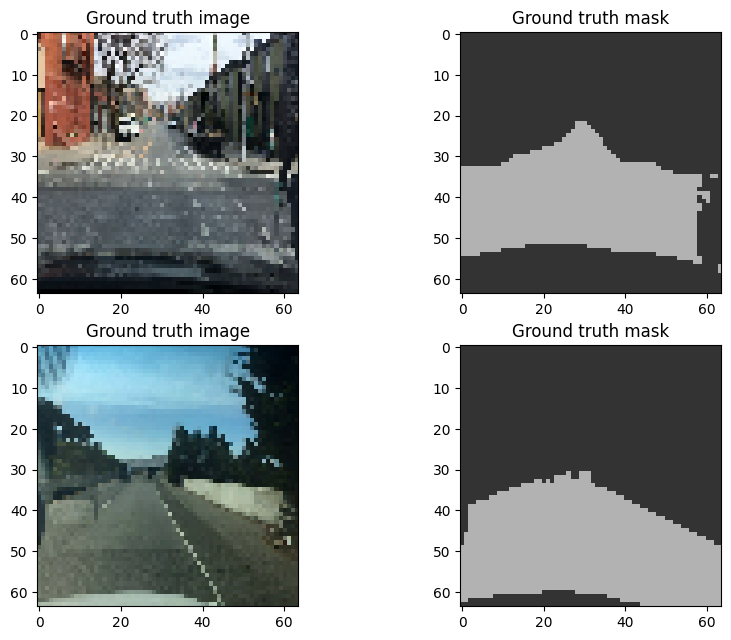

In [52]:
# visualize some samples from the training set
plt.figure(figsize=(10, 40))
s, e = 100, 102
index = 1

for i, j in zip(X_train[s:e], Y_train[s:e]):
    plt.subplot(10, 2, index)
    plt.imshow(i)
    plt.title('Ground truth image')

    plt.subplot(10, 2, index+1)
    plt.imshow(colorize_image(j, color_dict))
    plt.title('Ground truth mask')
    index += 2

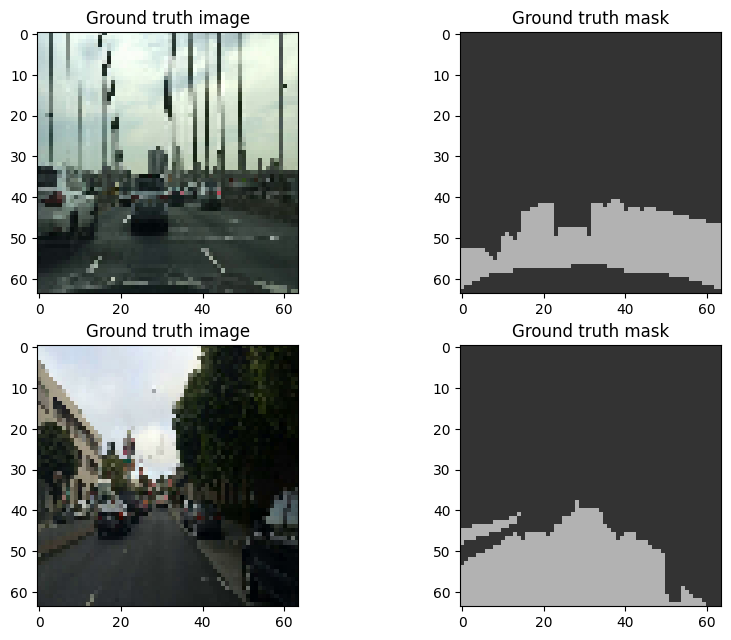

In [53]:
# visualize some samples from the validation set
plt.figure(figsize=(10, 40))
s, e = 50, 52
index = 1

for i, j in zip(X_val[s:e], Y_val[s:e]):
    plt.subplot(10, 2, index)
    plt.imshow(i)
    plt.title('Ground truth image')

    plt.subplot(10, 2, index+1)
    plt.imshow(colorize_image(j, color_dict))
    plt.title('Ground truth mask')
    index += 2

## Model Architecture

In [54]:
dr = 0.3

In [55]:
import tensorflow as tf

def preprocess_labels(labels, target_height=96, target_width=128):
    # Resize labels to match output dimensions
    return tf.image.resize(labels, (target_height, target_width), method='nearest')  # Use nearest neighbor for labels


In [ ]:
# Cloner le dépôt tensorflow/models
# !git clone https://github.com/tensorflow/models.git
# %cd models/research/deeplab


In [ ]:
import tensorflow as tf
import os
from glob import glob

# Find all checkpoint files
checkpoint_files = sorted(glob('./DeepLabV3.h5'))

if checkpoint_files:
    # Get the latest checkpoint file
    latest_checkpoint = checkpoint_files[-1]
    print(f"Resuming training from: {latest_checkpoint}")

    # Load the saved model
    model = tf.keras.models.load_model(latest_checkpoint)

    # Compile the model again (if necessary)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Resume training
    results = model.fit(
        X_train,
        Y_train,
        validation_split=0.1,
        batch_size=16,
        epochs=50,  # Additional epochs
        callbacks=callbacks
    )
else:
    print("No checkpoint files found. Please ensure the checkpoint directory is correct and contains saved models.")


No checkpoint files found. Please ensure the checkpoint directory is correct and contains saved models.


In [57]:

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Conv2DTranspose, GlobalAveragePooling2D, Reshape, Layer

# Enable memory growth for GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Custom layer to resize using tf.image.resize
class ResizeLayer(Layer):
    def __init__(self, target_size):
        super(ResizeLayer, self).__init__()
        self.target_size = target_size

    def call(self, inputs):
        return tf.image.resize(inputs, self.target_size)

# Function to create a DeepLabV3-like architecture
def DeepLabV3(num_classes, input_shape):
    inputs = Input(shape=input_shape)

    # Backbone: Pre-trained MobileNetV2 avec réduction alpha
    backbone = MobileNetV2(weights="imagenet", include_top=False, input_tensor=inputs, alpha=0.35)

    # Geler les poids de MobileNetV2
    for layer in backbone.layers:
        layer.trainable = False

    # Atrous Spatial Pyramid Pooling (ASPP)
    aspp1 = Conv2D(128, (1, 1), padding="same", dilation_rate=1, activation="relu")(backbone.output)
    aspp2 = Conv2D(128, (3, 3), padding="same", dilation_rate=6, activation="relu")(backbone.output)
    aspp3 = Conv2D(128, (3, 3), padding="same", dilation_rate=12, activation="relu")(backbone.output)
    aspp4 = Conv2D(128, (3, 3), padding="same", dilation_rate=18, activation="relu")(backbone.output)

    # Global Average Pooling
    global_avg = GlobalAveragePooling2D()(backbone.output)
    global_avg = Reshape((1, 1, global_avg.shape[-1]))(global_avg)
    global_avg = Conv2D(128, (1, 1), padding="same", activation="relu")(global_avg)
    global_avg = UpSampling2D(size=(aspp1.shape[1], aspp1.shape[2]))(global_avg)

    # Concatenate all ASPP features
    aspp_concat = Concatenate()([aspp1, aspp2, aspp3, aspp4, global_avg])
    aspp_output = Conv2D(128, (1, 1), padding="same", activation="relu")(aspp_concat)

    # Decoder with skip connection
    decoder_input = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu")(aspp_output)
    skip_connection = backbone.get_layer("block_13_expand_relu").output  # Check appropriate layer name for MobileNetV2

    # Resize skip_connection to match decoder_input dimensions using custom layer
    skip_connection_resized = ResizeLayer((decoder_input.shape[1], decoder_input.shape[2]))(skip_connection)
    decoder_merged = Concatenate()([decoder_input, skip_connection_resized])

    decoder_output = Conv2D(128, (3, 3), padding="same", activation="relu")(decoder_merged)

    # Final Upsampling and Output
    decoder_output = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu")(decoder_output)  # 32x32
    decoder_output = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu")(decoder_output)  # 64x64
    final_output = Conv2D(num_classes, kernel_size=(1, 1), activation="softmax")(decoder_output)  # Now shape is (batch_size, 64, 64, num_classes)

    # Ensuring final output is of shape (64, 64, num_classes)
    final_output = UpSampling2D(size=(4, 4), interpolation="bilinear")(final_output)

    # Build the model
    model = Model(inputs, final_output)
    return model

# Adjust input shape
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 64, 64, 3

# Initialize the model with MobileNetV2
model = DeepLabV3(num_classes=2, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

# Define callbacks
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_for_segmentation_deeplab_mobilenetv2.keras', verbose=1, save_best_only=True
)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

# Training the model
results = model.fit(
    X_train,
    Y_train,
    validation_split=0.1,
    batch_size=2,  # Adjust batch size as needed
    epochs=40,
    callbacks=callbacks
)


Physical devices cannot be modified after being initialized


<ipython-input-57-71aa11ed3136>:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  backbone = MobileNetV2(weights="imagenet", include_top=False, input_tensor=inputs, alpha=0.35)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 32, 32, 16)     │            432 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 32, 32, 16)     │             64 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 32, 32, 16)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 32, 32, 16)     │            144 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 32, 32, 8)      │            128 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 32, 32, 8)      │             32 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 32, 32, 48)     │            384 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 32, 32, 48)     │            192 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 32, 32, 48)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 33, 33, 48)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 16, 16, 48)     │            432 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 6,056,034 (23.10 MB)

 Trainable params: 5,645,826 (21.54 MB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.8644 - loss: 0.2867 - val_accuracy: 0.8938 - val_loss: 0.2340 - learning_rate: 0.0010
Epoch 2/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.8983 - loss: 0.2293 - val_accuracy: 0.9006 - val_loss: 0.2224 - learning_rate: 0.0010
Epoch 3/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.8993 - loss: 0.2282 - val_accuracy: 0.9042 - val_loss: 0.2181 - learning_rate: 0.0010
Epoch 4/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9069 - loss: 0.2131 - val_accuracy: 0.9008 - val_loss: 0.2231 - learning_rate: 0.0010
Epoch 5/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9089 - loss: 0.2117 - val_accuracy: 0.9028 - val_loss: 0.2204 - learning_rate: 0.0010
Epoch 6/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9109 - loss: 0.2049 - val_accuracy: 0.9048 - val_loss: 0.2177 - learning_rate: 0.0010
Epoch 7/40
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accura

In [58]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=-1).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step


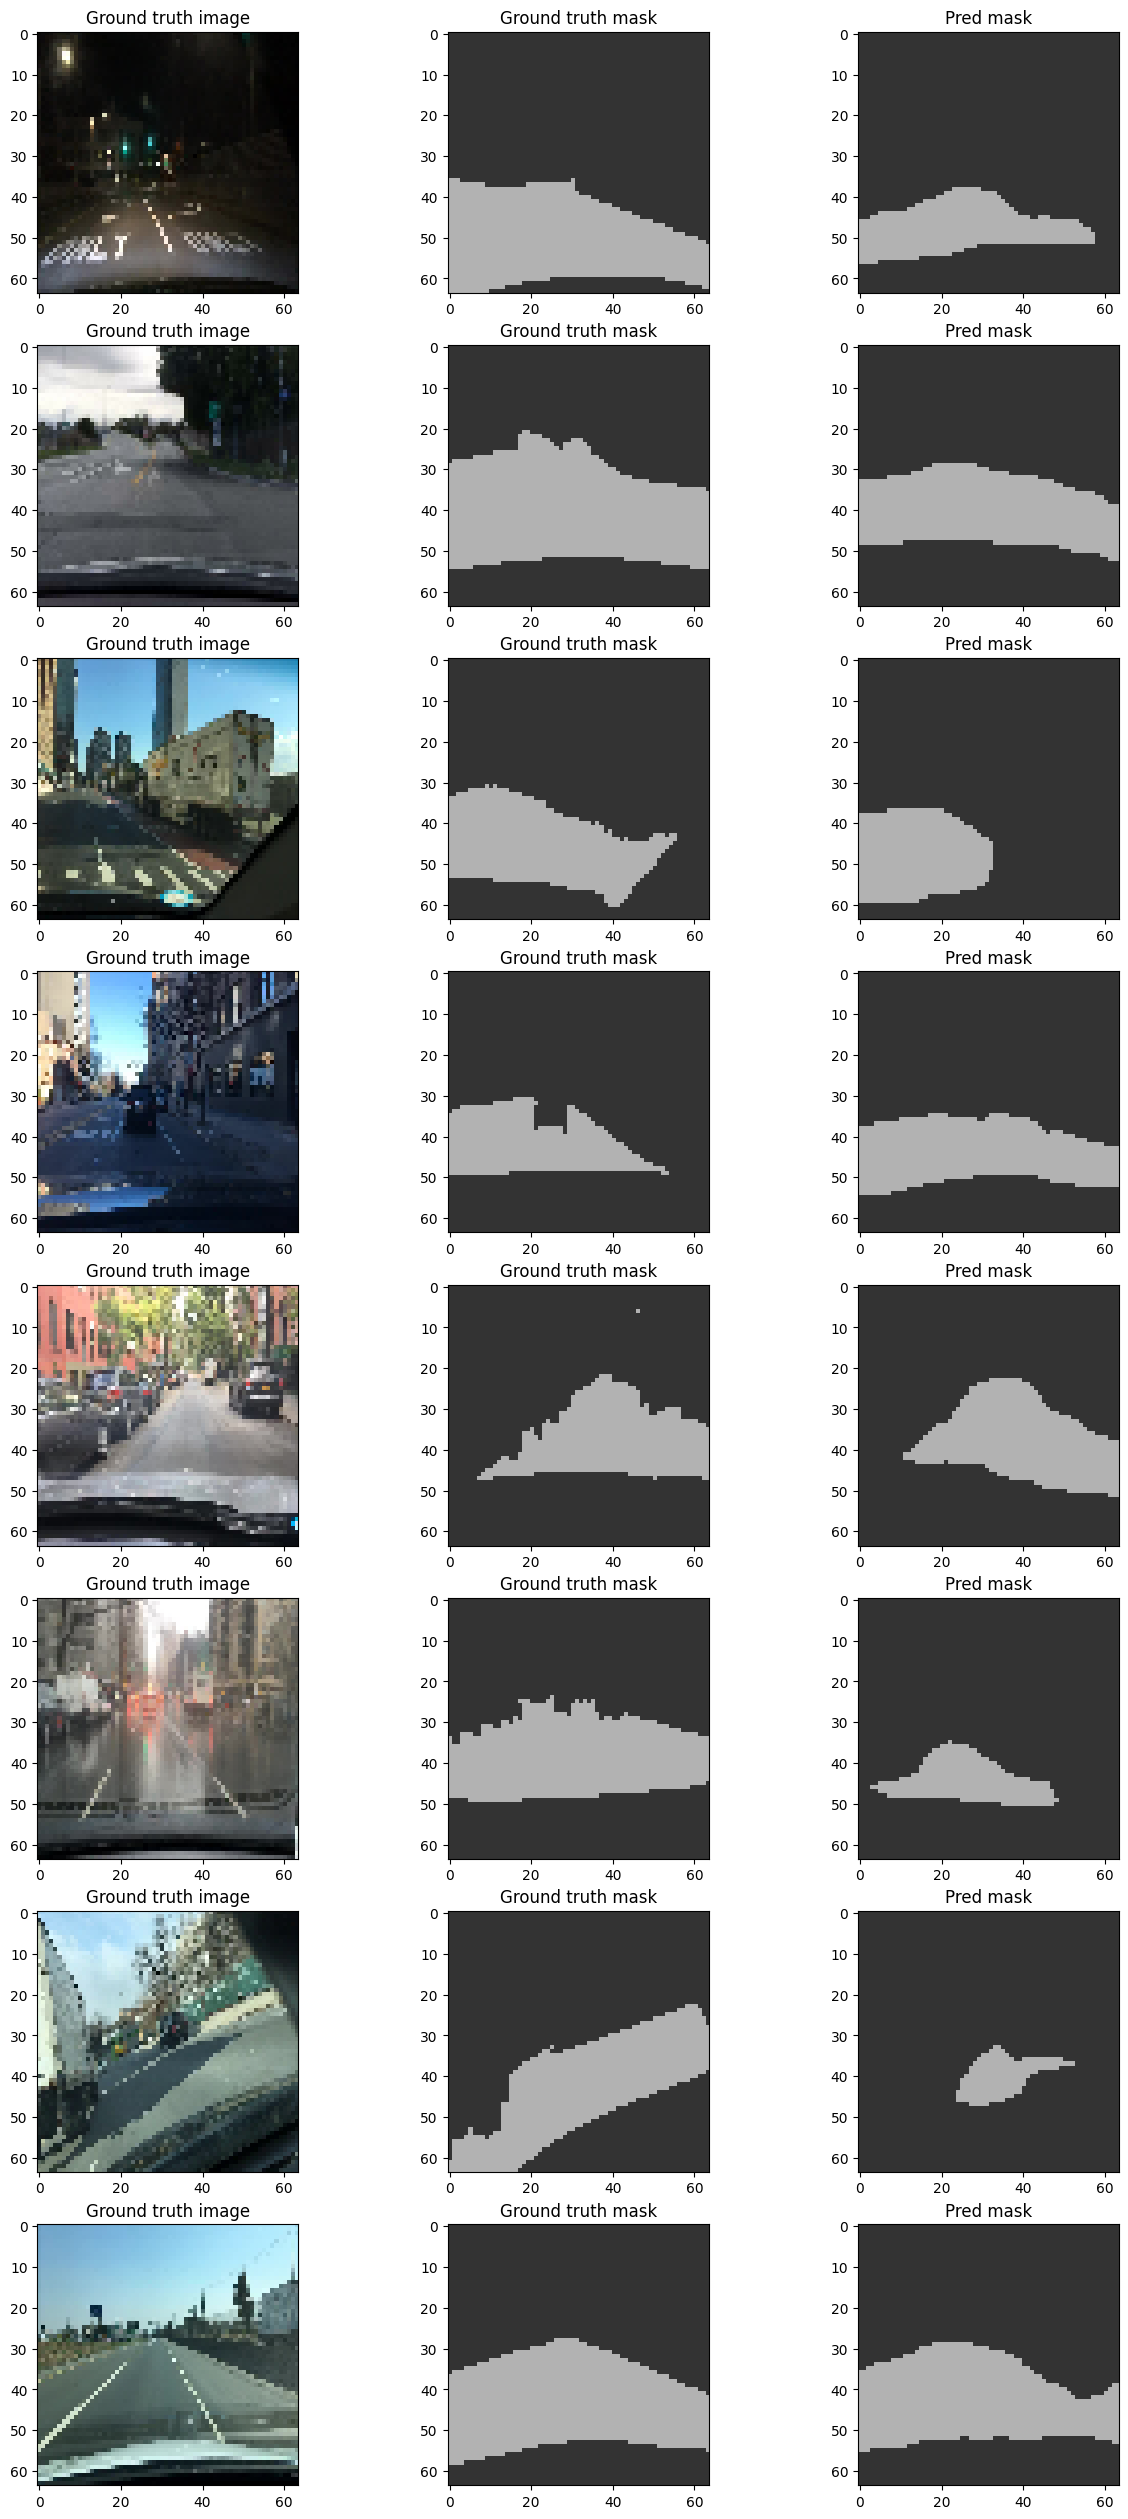

In [59]:
import cv2

# visualize some results from the test set.
plt.figure(figsize=(15, 40))
s, e = 10, 18
index = 1

for i, j, k in zip(X_test[s:e], Y_pred[s:e], Y_test[s:e]):

    plt.subplot(10, 3, index)
    plt.imshow(i)
    plt.title('Ground truth image')

    plt.subplot(10, 3, index+1)
    plt.imshow(colorize_image(k, color_dict))
    plt.title('Ground truth mask')

    plt.subplot(10, 3, index+2)
    plt.imshow(colorize_image(j, color_dict))
    plt.title('Pred mask')
    index += 3

In [60]:
model.save('./model.keras')

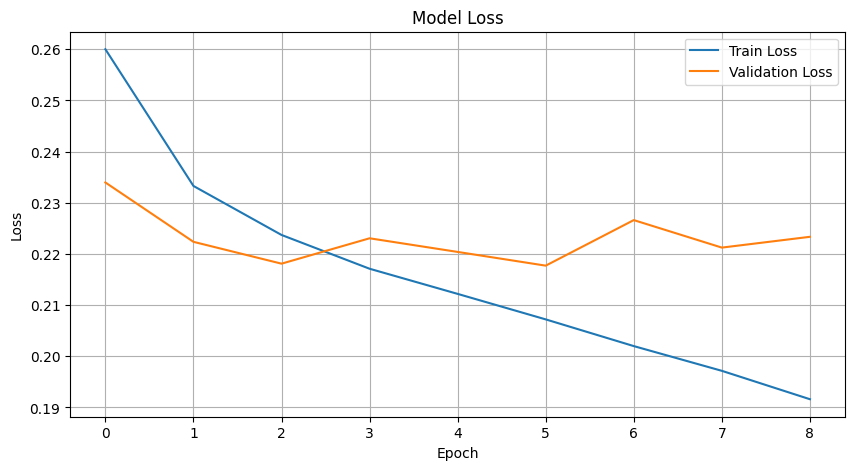

In [61]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

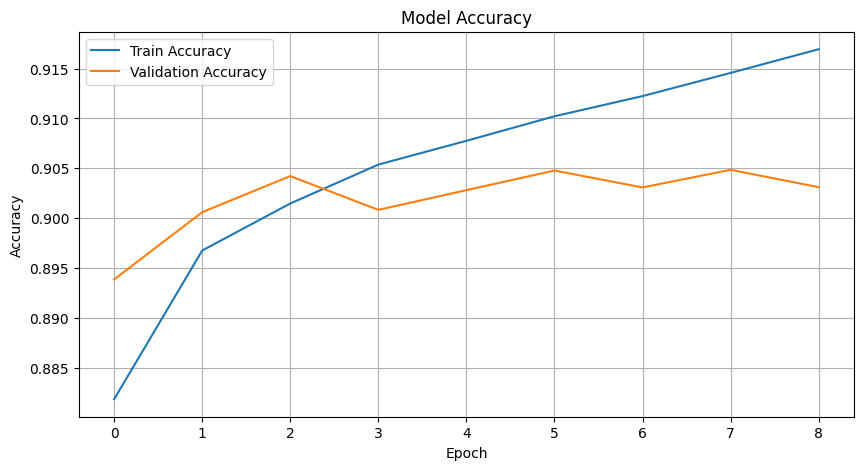

In [62]:
# Plot training & validation accuracy (if you save it during fitting)
plt.figure(figsize=(10, 5))
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


In [63]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8950 - loss: 0.2410
Test Loss: 0.2374
Test Accuracy: 0.8977


In [64]:
def calculate_iou(y_true, y_pred):
    # Flatten the arrays
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()

    # Calculate intersection and union
    intersection = np.sum((y_true_f == 1) & (y_pred_f == 1))
    union = np.sum(y_true_f == 1) + np.sum(y_pred_f == 1) - intersection

    iou = intersection / (union + 1e-6)  # Add small value to avoid division by zero
    return iou

# Calculate IoU for the test set
iou_scores = []
for true_mask, pred_mask in zip(Y_test, Y_pred):
    iou = calculate_iou(true_mask, pred_mask)
    iou_scores.append(iou)

mean_iou = np.mean(iou_scores)
print(f'Mean IoU: {mean_iou:.4f}')


Mean IoU: 0.8799


# Demo

In [82]:
import cv2
import numpy as np
from keras.models import load_model
import tensorflow as tf

class ResizeLayer(Layer):
    def __init__(self, target_size, **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.target_size = target_size

    def call(self, inputs):
        return tf.image.resize(inputs, self.target_size)

    def get_config(self):
        config = super(ResizeLayer, self).get_config()
        config.update({'target_size': self.target_size})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Charger le modèle sauvegardé
model = load_model('model.keras', custom_objects={'ResizeLayer': ResizeLayer})

# Chemin de la vidéo d'entrée et de la vidéo de sortie
input_video_path = 'challenge.mp4'  # Remplacez par le chemin de votre vidéo
output_video_path = 'demo.mp4'  # Chemin de sortie

# Ouvrir la vidéo d'entrée
cap = cv2.VideoCapture(input_video_path)

# Obtenir les propriétés de la vidéo
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Créer un objet VideoWriter pour la vidéo de sortie
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec pour .mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Prétraiter l'image pour le modèle
    input_frame = cv2.resize(frame, (64, 64))
    input_frame = np.expand_dims(input_frame, axis=0)
    input_frame = input_frame / 255.0

    # Effectuer la prédiction
    prediction = model.predict(input_frame)
    mask = np.argmax(prediction, axis=-1)[0]

    # Resize the mask to the original frame dimensions
    resized_mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_NEAREST)

    # Créer une image de masque (en rouge pour la route)
    red_mask = np.zeros_like(frame)
    red_mask[resized_mask == 0] = [255, 102, 102]  # Apply mask to resized mask

    # Combiner l'image originale avec le masque
    segmented_frame = cv2.addWeighted(frame, 1, red_mask, 0.5, 0)

    # Écrire la frame segmentée dans la vidéo de sortie
    out.write(segmented_frame)

# Libérer les ressources
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━